In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [9]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


we will find the outliers for continous varaible age,purchase

In [10]:
iqr=np.percentile(df['Purchase'], 75)-np.percentile(df['Purchase'], 25)

In [11]:
upp_limit=np.percentile(df['Purchase'],75)+(1.5*iqr)
len(df[df['Purchase']>upp_limit])

2677

In [12]:
lower_limit=np.percentile(df['Purchase'],25)-(1.5*iqr)
len(df[df['Purchase']<lower_limit])

0

<Axes: ylabel='Purchase'>

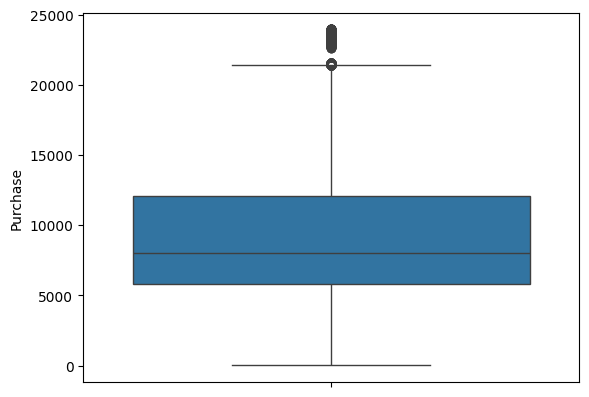

In [13]:
sns.boxplot(df['Purchase'])

to remove outliers we will clip data

In [14]:
df['Purchase']=df['Purchase'].clip(lower=np.percentile(df['Purchase'],5),upper=np.percentile(df['Purchase'],95))

<Axes: ylabel='Purchase'>

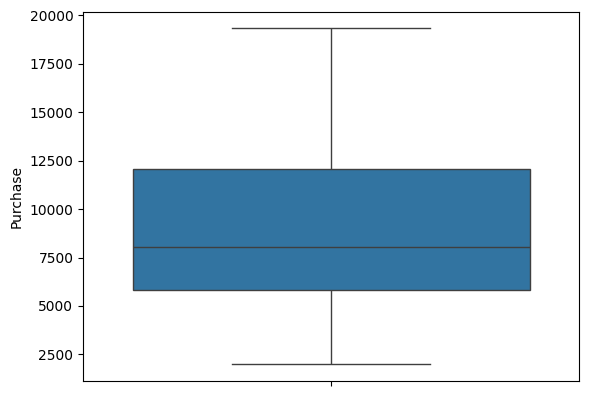

In [15]:
sns.boxplot(df['Purchase'])

<Axes: xlabel='count', ylabel='Age'>

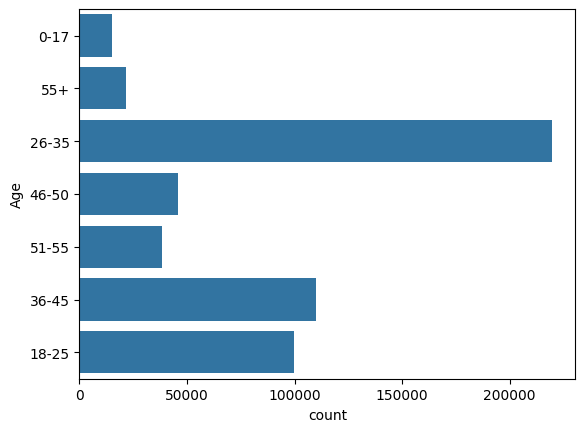

In [16]:
sns.countplot(df["Age"])

from 26-35 age people are brought frequently

<Axes: xlabel='count', ylabel='Gender'>

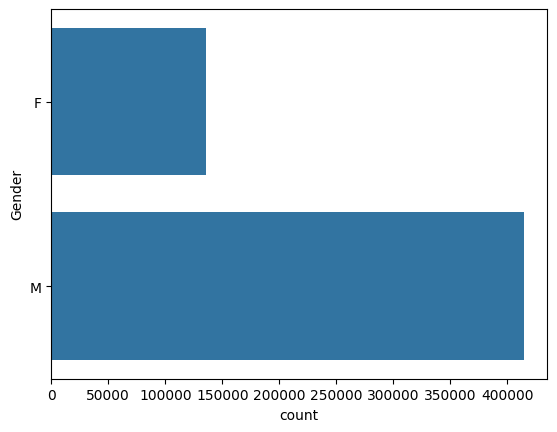

In [17]:
sns.countplot(df['Gender'])

male has more purchases then female

In [18]:
g1=pd.crosstab(df['Age'],df['Gender'])
g1

Gender,F,M
Age,,
0-17,5083,10019
18-25,24628,75032
26-35,50752,168835
36-45,27170,82843
46-50,13199,32502
51-55,9894,28607
55+,5083,16421


<Axes: xlabel='Gender', ylabel='Age'>

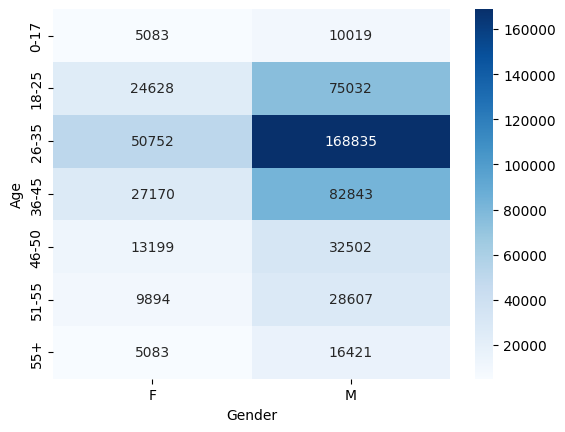

In [19]:
sns.heatmap(g1,annot=True,fmt='d',cmap='Blues')

we can alos do chisquare test

In [20]:
from scipy.stats import chi2_contingency

In [21]:
chi2_contingency(g1)

Chi2ContingencyResult(statistic=np.float64(1412.7156576195036), pvalue=np.float64(4.2750569064914816e-302), dof=6, expected_freq=array([[  3728.60722311,  11373.39277689],
       [ 24605.54865944,  75054.45134056],
       [ 54214.9168521 , 165372.0831479 ],
       [ 27161.65186304,  82851.34813696],
       [ 11283.34516642,  34417.65483358],
       [  9505.70167507,  28995.29832493],
       [  5309.22856083,  16194.77143917]]))

In [22]:
if 0.05<4.2750569064914816e-302:
  print('reject alternate')
else:
  print('reject null')

reject null


so we can conlucde age,gender are dependet

<Axes: xlabel='Age', ylabel='count'>

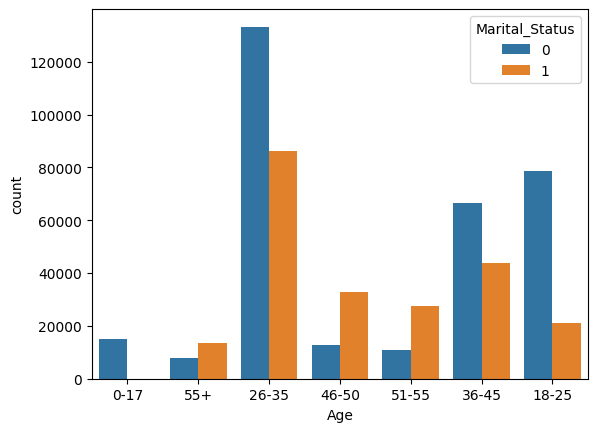

In [23]:
sns.countplot(data=df,x='Age',hue='Marital_Status')

In [24]:
g1=pd.crosstab(df['Age'],df['Marital_Status'])
g1

Marital_Status,0,1
Age,,
0-17,15102,0
18-25,78544,21116
26-35,133296,86291
36-45,66377,43636
46-50,12690,33011
51-55,10839,27662
55+,7883,13621


<Axes: xlabel='Marital_Status', ylabel='Age'>

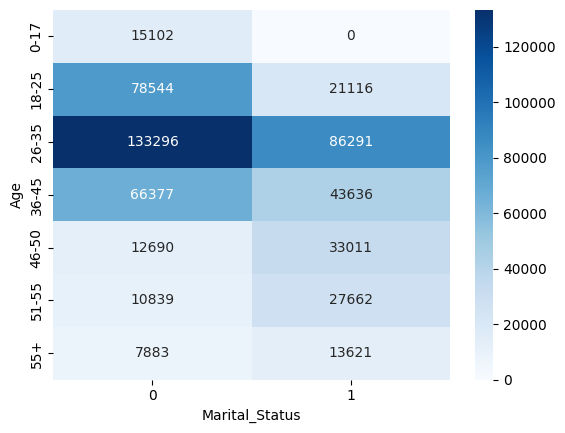

In [25]:
sns.heatmap(g1,annot=True,fmt='d',cmap='Blues')

In [26]:
chi2_contingency(g1)

Chi2ContingencyResult(statistic=np.float64(65038.31034963805), pvalue=np.float64(0.0), dof=6, expected_freq=array([[  8915.42056982,   6186.57943018],
       [ 58833.98318026,  40826.01681974],
       [129632.52924548,  89954.47075452],
       [ 64945.84579179,  45067.15420821],
       [ 26979.44877906,  18721.55122094],
       [ 22728.95029524,  15772.04970476],
       [ 12694.82213835,   8809.17786165]]))

age,martial statsu are dependetn

In [27]:
c1=df.groupby(["Age",'Marital_Status'])['Purchase'].sum()
c1

Age    Marital_Status
0-17   0                  135021682
18-25  0                  723842982
       1                  189940652
26-35  0                 1232038629
       1                  797775316
36-45  0                  623528423
       1                  402114185
46-50  0                  113593099
       1                  307048570
51-55  0                  103459507
       1                  262872243
55+    0                   75141706
       1                  125443231
Name: Purchase, dtype: int64

<Axes: xlabel='Age,Marital_Status'>

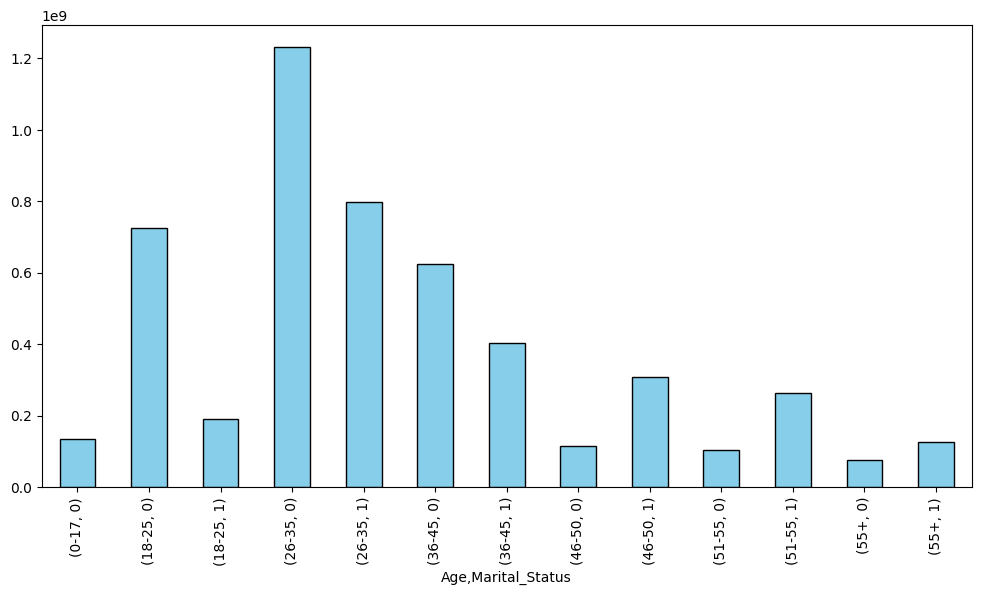

In [28]:
c1.plot(kind='bar',figsize=(12,6), color="skyblue", edgecolor="black")

even they spend more

how does gender affect amount spent

In [29]:
Male=df[df['Gender']=='M']
Female=df[df['Gender']=='F']

In [30]:
mu=Male['Purchase'].mean()
print(mu)
std=Male['Purchase'].std()
print(std)


9427.240996574606
4925.9534922859


In [31]:
mu=Female['Purchase'].mean()
print(mu)
std=Female['Purchase'].std()
print(std)

8736.540266109021
4596.984613522649


# 300 sample

In [32]:
male_sample_300=[np.mean(Male['Purchase'].sample(300)) for i in range(1000)]

In [33]:
male_mean_300=np.mean(male_sample_300)
print(male_mean_300)
std_300=np.std(male_sample_300)
print(std_300)
se_300=std_300/np.sqrt(300)
print(se_300)

9431.020516666666
288.66079877509776
16.665838987729508


In [34]:
z = 1.96
lower=male_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+male_mean_300
print(upper)

9398.355472250716
9463.685561082615


In [35]:
female_sample_300=[np.mean(Female['Purchase'].sample(300)) for i in range(1000)]

In [36]:
female_mean_300=np.mean(female_sample_300)
print(female_mean_300)
std_300=np.std(female_sample_300)
print(std_300)
se_300=std_300/np.sqrt(300)
print(se_300)

8737.7361
262.63570882216936
15.163279718728763


In [37]:
z = 1.96
lower=female_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+female_mean_300
print(upper)

8708.016071751292
8767.456128248708


<Axes: ylabel='Count'>

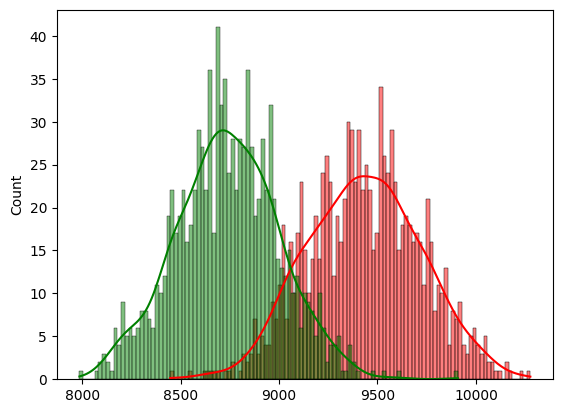

In [38]:
sns.histplot(male_sample_300,kde=True,bins=100,color='r')
sns.histplot(female_sample_300,kde=True,bins=100,color='g')

# **3000 sample**

In [39]:
male_sample_300=[np.mean(Male['Purchase'].sample(3000)) for i in range(1000)]
male_mean_300=np.mean(male_sample_300)
print(male_mean_300)
std_300=np.std(male_sample_300)
print(std_300)
se_300=std_300/np.sqrt(3000)
print(se_300)

9429.153534666668
88.12560645851228
1.6089460850383377


In [40]:
z = 1.96
lower=male_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+male_mean_300
print(upper)

9426.000000339993
9432.307068993343


In [41]:
female_sample_300=[np.mean(Female['Purchase'].sample(3000)) for i in range(1000)]
female_mean_300=np.mean(female_sample_300)
print(female_mean_300)
std_300=np.std(female_sample_300)
print(std_300)
se_300=std_300/np.sqrt(3000)
print(se_300)

8733.064762333333
83.10956058970098
1.517366035977386


In [42]:
z = 1.96
lower=female_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+female_mean_300
print(upper)

8730.090724902817
8736.03879976385


<Axes: ylabel='Count'>

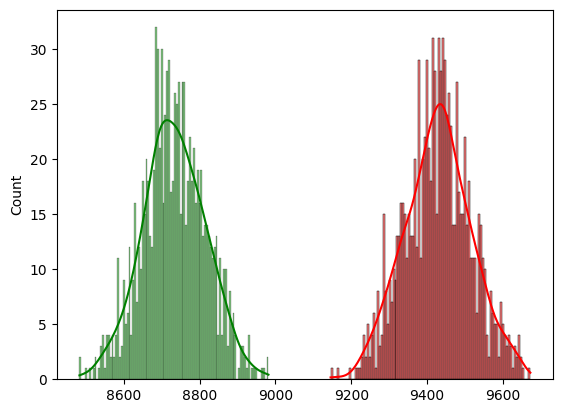

In [43]:
sns.histplot(male_sample_300,kde=True,bins=100,color='r')
sns.histplot(female_sample_300,kde=True,bins=100,color='g')

 30000

In [44]:
male_sample_300=[np.mean(Male['Purchase'].sample(30000)) for i in range(1000)]
male_mean_300=np.mean(male_sample_300)
print(male_mean_300)
std_300=np.std(male_sample_300)
print(std_300)
se_300=std_300/np.sqrt(30000)
print(se_300)

9426.958689766667
26.525508001394822
0.15314509184996875


In [45]:
z = 1.96
lower=male_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+male_mean_300
print(upper)

9426.658525386641
9427.258854146692


In [46]:
female_sample_300=[np.mean(Female['Purchase'].sample(30000)) for i in range(1000)]
female_mean_300=np.mean(female_sample_300)
print(female_mean_300)
std_300=np.std(female_sample_300)
print(std_300)
se_300=std_300/np.sqrt(30000)
print(se_300)

8735.538274066666
24.074454291621866
0.13899392665861227


In [47]:
z=1.96
lower=female_mean_300-(z*se_300)
print(lower)
upper=(z*se_300)+female_mean_300
print(upper)

8735.265845970416
8735.810702162917


<Axes: ylabel='Count'>

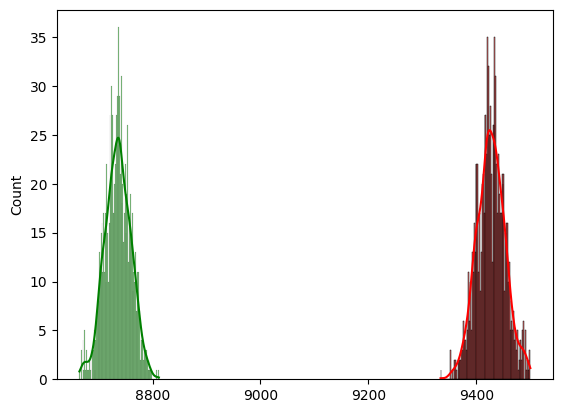

In [48]:
sns.histplot(male_sample_300,kde=True,bins=100,color='r')
sns.histplot(female_sample_300,kde=True,bins=100,color='g')

### For plot 1

sample sie=300
Both male (red) and female (green) distributions are wide and overlapping.
High variance because the sample is small.
It’s unclear if males truly spend more — the noise hides the effect.

## for plot 2

sample size=3000
Distributions are narrower (reduced variance).
Some overlap still exists, but separation is becoming more visible.
Gender difference in spending is emerging more clearly.

## for plot 3

sample size=30000
Distributions are very narrow (almost sharp peaks).
No overlap — males consistently spend more than females.
Confirms that the gender effect is statistically significant with large data.

male mean is higher then female and if increase sample size their distribution is not overlapping so male has a higher purchase and with 95% ci we can clealry see ci is greater for male

The 95% confidence intervals for average spending by males and females do not overlap, which indicates that males spend significantly more than females at Walmart. This insight suggests that Walmart can focus its premium product marketing and loyalty programs more toward male customers, while simultaneously creating targeted promotions to encourage higher spending among female shoppers.”

In [49]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


## How does Marital_Status affect the amount spent?

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

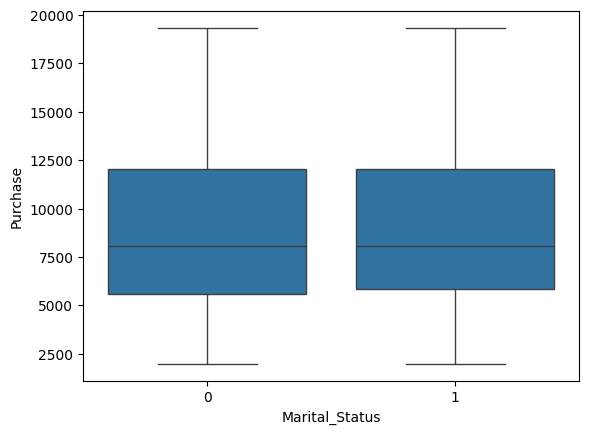

In [50]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)

In [51]:
df.groupby('Marital_Status')['Purchase'].mean()

,Purchase
Marital_Status,
0,9258.820464
1,9253.669823


In [52]:
un_married=df[df['Marital_Status']==0]
married=df[df['Marital_Status']==1]

In [53]:
u1=un_married['Purchase'].mean()
print(u1)
std1=un_married['Purchase'].std()
print(std1)

9258.820463706883
4864.581471475336


In [54]:
m1=married['Purchase'].mean()
print(m1)
std2=married['Purchase'].std()
print(std2)

9253.669823420034
4843.48644692002


for 300 sample

In [55]:
un_sample=[np.mean(un_married['Purchase'].sample(300)) for i in range(1000)]
un_mean=np.mean(un_sample)
print(un_mean)
std1=np.std(un_sample)
print(std1)
se=std1/np.sqrt(300)
print(se)


9253.660053333335
282.79025677640277
16.326903087405952


In [56]:
z = 1.96
lower=un_mean-(z*se)
print(lower)
upper=(z*se)+un_mean
print(upper)

9221.65932328202
9285.66078338465


In [57]:
married_sample=[np.mean(married['Purchase'].sample(300)) for i in range(1000)]
ma_mean=np.mean(married_sample)
print(ma_mean)
std1=np.std(married_sample)
print(std1)
se=std1/np.sqrt(300)
print(se)

9235.089416666666
280.214779999009
16.17820786633396


In [58]:
z = 1.96
lower=ma_mean-(z*se)
print(lower)
upper=(z*se)+ma_mean
print(upper)

9203.380129248651
9266.79870408468


<Axes: ylabel='Count'>

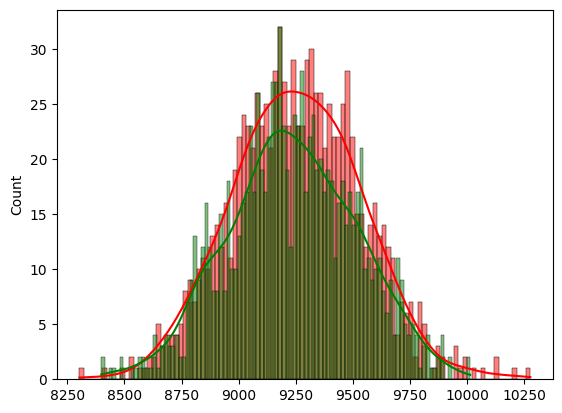

In [59]:
sns.histplot(un_sample,kde=True,bins=100,color='r')
sns.histplot(married_sample,kde=True,bins=100,color='g')

In [60]:
un_sample=[np.mean(un_married['Purchase'].sample(3000)) for i in range(1000)]
un_mean=np.mean(un_sample)
print(un_mean)
std1=np.std(un_sample)
print(std1)
se=std1/np.sqrt(3000)
print(se)

9258.597303333334
86.97344815109182
1.587910648545299


In [61]:
z = 1.96
lower=un_mean-(z*se)
print(lower)
upper=(z*se)+un_mean
print(upper)

9255.484998462185
9261.709608204483


In [62]:
married_sample=[np.mean(married['Purchase'].sample(3000)) for i in range(1000)]
ma_mean=np.mean(married_sample)
print(ma_mean)
std1=np.std(married_sample)
print(std1)
se=std1/np.sqrt(3000)
print(se)

9254.072043666669
89.19450164126947
1.6284613518118283


In [63]:
z = 1.96
lower=ma_mean-(z*se)
print(lower)
upper=(z*se)+ma_mean
print(upper)

9250.880259417117
9257.26382791622


<Axes: ylabel='Count'>

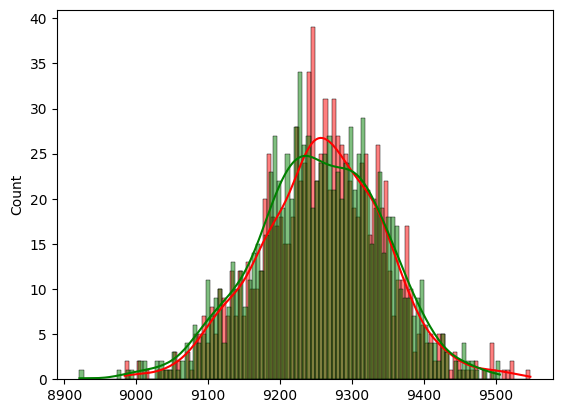

In [64]:
sns.histplot(un_sample,kde=True,bins=100,color='r')
sns.histplot(married_sample,kde=True,bins=100,color='g')

In [65]:
un_sample=[np.mean(un_married['Purchase'].sample(30000)) for i in range(1000)]
un_mean=np.mean(un_sample)
print(un_mean)
std1=np.std(un_sample)
print(std1)
se=std1/np.sqrt(30000)
print(se)

9259.588068166666
27.880079722013388
0.16096571532532658


In [66]:
z = 1.96
lower=un_mean-(z*se)
print(lower)
upper=(z*se)+un_mean
print(upper)

9259.272575364628
9259.903560968703


In [67]:
married_sample=[np.mean(married['Purchase'].sample(30000)) for i in range(1000)]
ma_mean=np.mean(married_sample)
print(ma_mean)
std1=np.std(married_sample)
print(std1)
se=std1/np.sqrt(30000)
print(se)

9254.309697633333
26.52517452478625
0.15314316652187146


In [68]:
z = 1.96
lower=ma_mean-(z*se)
print(lower)
upper=(z*se)+ma_mean
print(upper)

9254.00953702695
9254.609858239715


<Axes: ylabel='Count'>

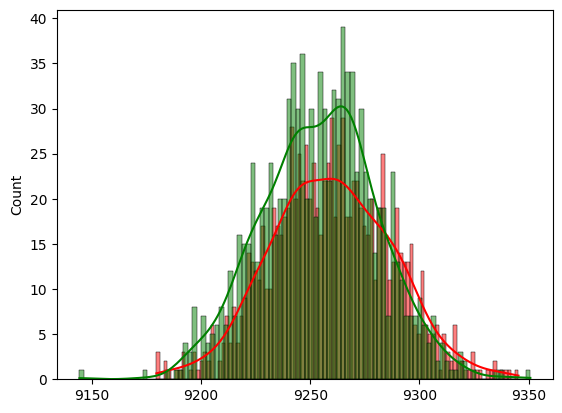

In [69]:
sns.histplot(un_sample,kde=True,bins=100,color='r')
sns.histplot(married_sample,kde=True,bins=100,color='g')

plot 1,2,3 both all overlapping so no signifacnt

How does Age affect the amount spent?

In [71]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


In [72]:
df.groupby('Age')['Purchase'].mean()

,Purchase
Age,
0-17,8940.649053
18-25,9169.010977
26-35,9243.780119
36-45,9322.921909
46-50,9204.211483
51-55,9514.863250
55+,9327.796549


In [73]:
teen=df[df["Age"]=='0-17']
young1=df[df["Age"]=='18-25']
young2=df[df["Age"]=='26-35']
mid1=df[df["Age"]=='36-45']
mid2=df[df["Age"]=='46-50']
senior1=df[df["Age"]=='51-55']
senior2=df[df["Age"]=='55+']

In [74]:
m1=teen['Purchase'].mean()
std1=teen['Purchase'].std()
m2=young1['Purchase'].mean()
std2=young1['Purchase'].std()
m3=young2['Purchase'].mean()
std3=young2['Purchase'].std()
m4=mid1['Purchase'].mean()
std4=mid1['Purchase'].std()
m5=mid2['Purchase'].mean()
std5=mid2['Purchase'].std()
m6=senior1['Purchase'].mean()
std6=senior1['Purchase'].std()
m7=senior2['Purchase'].mean()
std7=senior2['Purchase'].std()

In [75]:
print(m1,std1)
print(m2,std2)
print(m3,std3)
print(m4,std4)
print(m5,std5)
print(m6,std6)
print(m7,std7)

8940.64905310555 4940.597254004381
9169.010977322898 4889.430684308766
9243.780119041656 4855.192053150712
9322.92190922891 4847.597841932429
9204.211483337345 4785.942157208538
9514.863250305187 4873.62966817001
9327.796549479166 4779.935888621669


<Axes: xlabel='Age', ylabel='Purchase'>

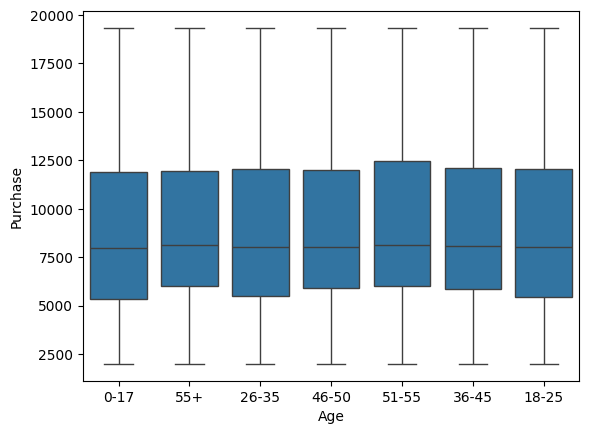

In [76]:
sns.boxplot(data=df,x='Age',y='Purchase')

In [77]:
sample1=[ np.mean(teen['Purchase'].sample(300)) for i in range(1000)]
mean1=np.mean(sample1)
print(mean1)
std1=np.std(sample1)
se=std1/np.sqrt(300)
print(se)
z=1.96
lower=mean1-(z*se)
print(lower)
upper=mean1+(z*se)
print(upper)


8926.033016666668
16.514018481486808
8893.665540442955
8958.400492890381


In [78]:
sample2=[ np.mean(young1['Purchase'].sample(300)) for i in range(1000)]
mean2=np.mean(sample2)
print(mean2)
std2=np.std(sample2)
se=std2/np.sqrt(300)
print(se)
z=1.96
lower=mean2-(z*se)
print(lower)
upper=mean2+(z*se)
print(upper)

9170.985676666665
15.821015978935518
9139.976485347952
9201.994867985379


In [79]:
sample3=[ np.mean(young2['Purchase'].sample(300)) for i in range(1000)]
mean3=np.mean(sample3)
print(mean3)
std3=np.std(sample3)
se=std3/np.sqrt(300)
print(se)
z=1.96
lower=mean3-(z*se)
print(lower)
upper=mean3+(z*se)
print(upper)

9248.28978
15.461021990277311
9217.986176899056
9278.593383100942


In [80]:
sample4=[ np.mean(mid1['Purchase'].sample(300)) for i in range(1000)]
mean4=np.mean(sample4)
print(mean4)
std4=np.std(sample4)
se=std4/np.sqrt(300)
print(se)
z=1.96
lower=mean4-(z*se)
print(lower)
upper=mean4+(z*se)
print(upper)

9316.136873333335
16.332485612924206
9284.125201532002
9348.148545134667


In [81]:
sample5=[ np.mean(mid2['Purchase'].sample(300)) for i in range(1000)]
mean5=np.mean(sample5)
print(mean5)
std5=np.std(sample5)
se=std5/np.sqrt(300)
print(se)
z=1.96
lower=mean5-(z*se)
print(lower)
upper=mean5+(z*se)
print(upper)

9206.33886
15.19761257872194
9176.551539345704
9236.126180654295


In [82]:
sample6=[ np.mean(senior1['Purchase'].sample(300)) for i in range(1000)]
mean6=np.mean(sample6)
print(mean6)
std6=np.std(sample6)
se=std6/np.sqrt(300)
print(se)
z=1.96
lower=mean6-(z*se)
print(lower)
upper=mean6+(z*se)
print(upper)

9511.282736666668
16.184215801284722
9479.56167369615
9543.003799637187


In [83]:
sample7=[ np.mean(senior2['Purchase'].sample(300)) for i in range(1000)]
mean7=np.mean(sample7)
print(mean7)
std7=np.std(sample7)
se=std7/np.sqrt(300)
print(se)
z=1.96
lower=mean7-(z*se)
print(lower)
upper=mean7+(z*se)
print(upper)

9344.915813333333
15.372234451036933
9314.7862338093
9375.045392857366


<Axes: ylabel='Count'>

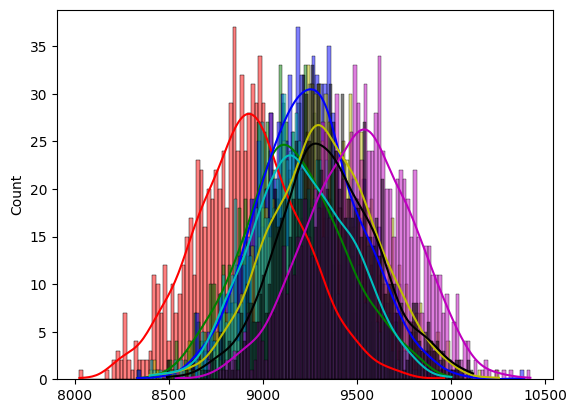

In [84]:
sns.histplot(sample1,kde=True,bins=100,color='r')
sns.histplot(sample2,kde=True,bins=100,color='g')
sns.histplot(sample3,kde=True,bins=100,color='b')
sns.histplot(sample4,kde=True,bins=100,color='y')
sns.histplot(sample5,kde=True,bins=100,color='c')
sns.histplot(sample6,kde=True,bins=100,color='m')
sns.histplot(sample7,kde=True,bins=100,color='k')

In [85]:
sample1=[ np.mean(teen['Purchase'].sample(3000)) for i in range(1000)]
mean1=np.mean(sample1)
print(mean1)
std1=np.std(sample1)
se=std1/np.sqrt(3000)
print(se)
z=1.96
lower=mean1-(z*se)
print(lower)
upper=mean1+(z*se)
print(upper)

sample2=[ np.mean(young1['Purchase'].sample(3000)) for i in range(1000)]
mean2=np.mean(sample2)
print(mean2)
std2=np.std(sample2)
se=std2/np.sqrt(3000)
print(se)
z=1.96
lower=mean2-(z*se)
print(lower)
upper=mean2+(z*se)
print(upper)

sample3=[ np.mean(young2['Purchase'].sample(3000)) for i in range(1000)]
mean3=np.mean(sample3)
print(mean3)
std3=np.std(sample3)
se=std3/np.sqrt(3000)
print(se)
z=1.96
lower=mean3-(z*se)
print(lower)
upper=mean3+(z*se)
print(upper)

sample4=[ np.mean(mid1['Purchase'].sample(3000)) for i in range(1000)]
mean4=np.mean(sample4)
print(mean4)
std4=np.std(sample4)
se=std4/np.sqrt(3000)
print(se)
z=1.96
lower=mean4-(z*se)
print(lower)
upper=mean4+(z*se)
print(upper)

sample5=[ np.mean(mid2['Purchase'].sample(3000)) for i in range(1000)]
mean5=np.mean(sample5)
print(mean5)
std5=np.std(sample5)
se=std5/np.sqrt(3000)
print(se)
z=1.96
lower=mean5-(z*se)
print(lower)
upper=mean5+(z*se)
print(upper)

sample6=[ np.mean(senior1['Purchase'].sample(3000)) for i in range(1000)]
mean6=np.mean(sample6)
print(mean6)
std6=np.std(sample6)
se=std6/np.sqrt(3000)
print(se)
z=1.96
lower=mean6-(z*se)
print(lower)
upper=mean6+(z*se)
print(upper)

sample7=[ np.mean(senior2['Purchase'].sample(3000)) for i in range(1000)]
mean7=np.mean(sample7)
print(mean7)
std7=np.std(sample7)
se=std7/np.sqrt(3000)
print(se)
z=1.96
lower=mean7-(z*se)
print(lower)
upper=mean7+(z*se)
print(upper)

8935.570155333333
1.49238535867927
8932.645080030321
8938.495230636345
9168.866793666666
1.61812996034446
9165.695258944392
9172.03832838894
9243.34338
1.6692408841923547
9240.071667866983
9246.615092133017
9324.658559333333
1.576704966157145
9321.568217599664
9327.748901067001
9206.955042666668
1.546098675924492
9203.924689261856
9209.98539607148
9516.915147333333
1.5933758042837576
9513.792130756938
9520.038163909729
9326.876039666668
1.442186413908832
9324.049354295406
9329.702725037929


<Axes: ylabel='Count'>

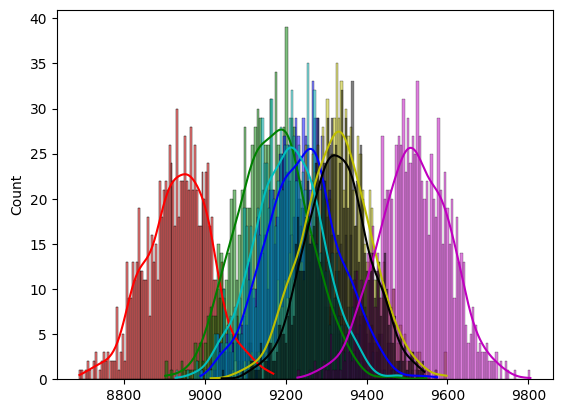

In [86]:
sns.histplot(sample1,kde=True,bins=100,color='r')
sns.histplot(sample2,kde=True,bins=100,color='g')
sns.histplot(sample3,kde=True,bins=100,color='b')
sns.histplot(sample4,kde=True,bins=100,color='y')
sns.histplot(sample5,kde=True,bins=100,color='c')
sns.histplot(sample6,kde=True,bins=100,color='m')
sns.histplot(sample7,kde=True,bins=100,color='k')

In [87]:
sample1=[ np.mean(teen['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean1=np.mean(sample1)
print(mean1)
std1=np.std(sample1)
se=std1/np.sqrt(30000)
print(se)
z=1.96
lower=mean1-(z*se)
print(lower)
upper=mean1+(z*se)
print(upper)

sample2=[ np.mean(young1['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean2=np.mean(sample2)
print(mean2)
std2=np.std(sample2)
se=std2/np.sqrt(30000)
print(se)
z=1.96
lower=mean2-(z*se)
print(lower)
upper=mean2+(z*se)
print(upper)

sample3=[ np.mean(young2['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean3=np.mean(sample3)
print(mean3)
std3=np.std(sample3)
se=std3/np.sqrt(30000)
print(se)
z=1.96
lower=mean3-(z*se)
print(lower)
upper=mean3+(z*se)
print(upper)

sample4=[ np.mean(mid1['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean4=np.mean(sample4)
print(mean4)
std4=np.std(sample4)
se=std4/np.sqrt(30000)
print(se)
z=1.96
lower=mean4-(z*se)
print(lower)
upper=mean4+(z*se)
print(upper)

sample5=[ np.mean(mid2['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean5=np.mean(sample5)
print(mean5)
std5=np.std(sample5)
se=std5/np.sqrt(30000)
print(se)
z=1.96
lower=mean5-(z*se)
print(lower)
upper=mean5+(z*se)
print(upper)

sample6=[ np.mean(senior1['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean6=np.mean(sample6)
print(mean6)
std6=np.std(sample6)
se=std6/np.sqrt(30000)
print(se)
z=1.96
lower=mean6-(z*se)
print(lower)
upper=mean6+(z*se)
print(upper)

sample7=[ np.mean(senior2['Purchase'].sample(30000,replace=True)) for i in range(1000)]
mean7=np.mean(sample7)
print(mean7)
std7=np.std(sample7)
se=std7/np.sqrt(30000)
print(se)
z=1.96
lower=mean7-(z*se)
print(lower)
upper=mean7+(z*se)
print(upper)

8940.726786966667
0.1665236903487722
8940.400400533583
8941.05317339975
9169.560664266666
0.16247648435030698
9169.242210357339
9169.879118175993
9244.096946999998
0.15915854353332057
9243.784996254673
9244.408897745323
9323.7907724
0.15451426124360407
9323.487924447962
9324.093620352038
9203.574647500001
0.16489245745592856
9203.251458283388
9203.897836716615
9515.708157466666
0.16936645398311884
9515.37619921686
9516.040115716472
9327.194392266667
0.15969603443288707
9326.881388039179
9327.507396494155


<Axes: ylabel='Count'>

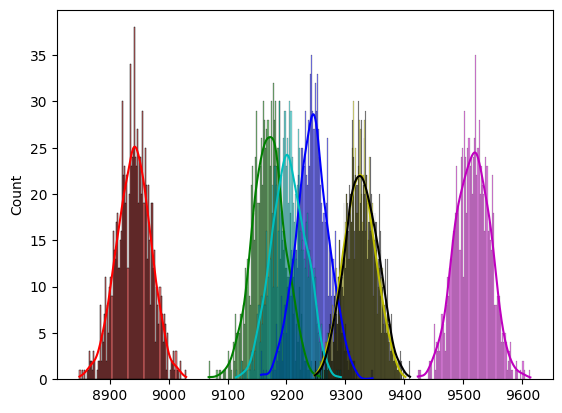

In [88]:
sns.histplot(sample1,kde=True,bins=100,color='r')
sns.histplot(sample2,kde=True,bins=100,color='g')
sns.histplot(sample3,kde=True,bins=100,color='b')
sns.histplot(sample4,kde=True,bins=100,color='y')
sns.histplot(sample5,kde=True,bins=100,color='c')
sns.histplot(sample6,kde=True,bins=100,color='m')
sns.histplot(sample7,kde=True,bins=100,color='k')

<Axes: >

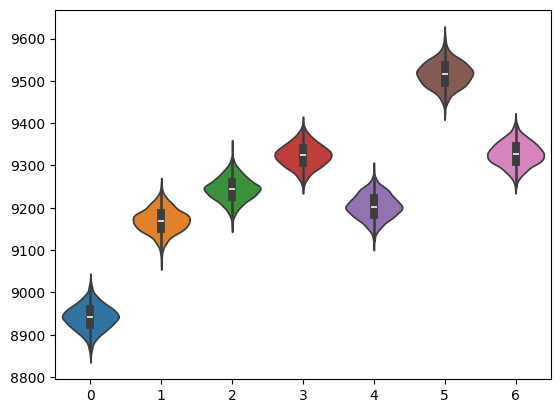

In [89]:
sns.violinplot(data=[sample1, sample2, sample3, sample4, sample5, sample6, sample7])

<Axes: >

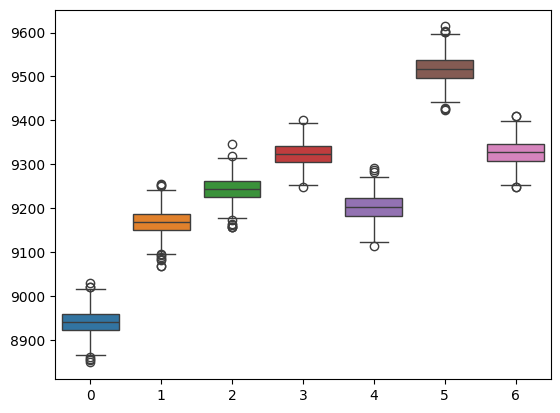

In [90]:
sns.boxplot(data=[sample1, sample2, sample3, sample4, sample5, sample6, sample7])


In [91]:
from scipy.stats import f_oneway

In [92]:
f_oneway(sample1, sample2, sample3, sample4, sample5, sample6, sample7)

F_onewayResult(statistic=np.float64(39167.90318984815), pvalue=np.float64(0.0))

increase the sample size show age has affect on spending
50 to 55 and 55 spend more